In [105]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

### Preprar e Tratar os dados

In [18]:
pratos_df = pd.read_csv("pratos.csv")

pratos_df.head(20)

,ID_OBSERVACAO,DIA_SEMANA,PROTEINA_ONTEM,NATURALIDADE,COMPLEXIDADE_MAX,E_FIM_SEMANA,PRATO_RECOMENDADO,FUNGE_SIM_NAO
0,1,Segunda,Carne Vaca,Benguela,Baixa,0,Feijão de Óleo de Palma,0
1,2,Quarta,Peixe,Huíla,Média,0,Muamba de Galinha,1
2,3,Sábado,Carne Seca,Luanda,Alta,1,Mufete,0
3,4,Sexta,Frango,Zaire,Baixa,0,Funge com Quizaca,1
4,5,Quinta,Feijão,Malanje,Média,0,Marrabenta de Peixe,1
5,6,Domingo,Peixe,Benguela,Alta,1,Calulu de Peixe Fresco,1
6,7,Terça,Miúdos,Luanda,Média,0,Muamba de Galinha,1
7,8,Sábado,Carne Vaca,Zaire,Alta,1,Fumbua (Tradicional),1
8,9,Quinta,Carne Vaca,Huíla,Baixa,0,Funge com Kizaca,1
9,10,Terça,Frango,Malanje,Baixa,0,Funge com Quizaca,1


#### Dados X --> Features

In [25]:
# Codificação Ordinaria

ordem_dia_semana = [["Domingo" , "Segunda" , "Terça" , "Quarta" , "Quinta" , "Sexta" , "Sábado"]]
ordem_complexidade_max = [["Baixa" , "Média" , "Alta"]]

encoder_ordinal_dia_semana = OrdinalEncoder(categories=ordem_dia_semana)
encoder_ordinal_complexidade_max = OrdinalEncoder(categories=ordem_complexidade_max)

In [30]:
pratos_df["DIA_SEMANA_ENCODER"] = encoder_ordinal_dia_semana.fit_transform(pratos_df[["DIA_SEMANA"]])
pratos_df["COMPLEXIDADE_MAX_ENCODER"] = encoder_ordinal_complexidade_max.fit_transform(pratos_df[["COMPLEXIDADE_MAX"]])

pratos_df

,ID_OBSERVACAO,DIA_SEMANA,PROTEINA_ONTEM,NATURALIDADE,COMPLEXIDADE_MAX,E_FIM_SEMANA,PRATO_RECOMENDADO,FUNGE_SIM_NAO,DIA_SEMANA_ENCODER,COMPLEXIDADE_MAX_ENCODER
0,1,Segunda,Carne Vaca,Benguela,Baixa,0,Feijão de Óleo de Palma,0,1.0,0.0
1,2,Quarta,Peixe,Huíla,Média,0,Muamba de Galinha,1,3.0,1.0
2,3,Sábado,Carne Seca,Luanda,Alta,1,Mufete,0,6.0,2.0
3,4,Sexta,Frango,Zaire,Baixa,0,Funge com Quizaca,1,5.0,0.0
4,5,Quinta,Feijão,Malanje,Média,0,Marrabenta de Peixe,1,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,96,Quinta,Peixe,Luanda,Média,0,Calulu de Peixe Seco,1,4.0,1.0
96,97,Segunda,Frango,Malanje,Média,0,Marrabenta de Peixe,1,1.0,1.0
97,98,Sexta,Carne Seca,Benguela,Média,0,Calulu de Peixe Fresco,1,5.0,1.0
98,99,Domingo,Feijão,Zaire,Alta,1,Fumbua (Tradicional),1,0.0,2.0


In [34]:
#Codificação OneHotEncoder
encoder_one_hot_proteina = OneHotEncoder(sparse_output=False)
encoder_one_hot_naturalidade = OneHotEncoder(sparse_output=False)

In [48]:
#Proteinas OneHotEncoder

proteina = encoder_one_hot_proteina.fit_transform(pratos_df[["PROTEINA_ONTEM"]])
proteina_df = pd.DataFrame(proteina, columns=encoder_one_hot_proteina.get_feature_names_out(["PROTEINA_ONTEM"]))

#Naturalidade OneHotEncoder

naturalidade = encoder_one_hot_naturalidade.fit_transform(pratos_df[["NATURALIDADE"]])
naturalidade_df = pd.DataFrame(naturalidade, columns=encoder_one_hot_naturalidade.get_feature_names_out(["NATURALIDADE"]))

#concatenar os DataFrames union proteina_df + naturalidade_df + pratos_df

PratosDataFrame = pd.concat([pratos_df, proteina_df, naturalidade_df], axis=1)

In [57]:
#LabelEncoder Target - Alvo - Rótulo

encoder_prato_recomendado = LabelEncoder()

PratosDataFrame["PRATO_RECOMENDADO_ENCODER"] = encoder_prato_recomendado.fit_transform(pratos_df["PRATO_RECOMENDADO"])

In [61]:
Pratos_number = PratosDataFrame.select_dtypes(include="number")

Pratos_number

,ID_OBSERVACAO,E_FIM_SEMANA,FUNGE_SIM_NAO,DIA_SEMANA_ENCODER,COMPLEXIDADE_MAX_ENCODER,PROTEINA_ONTEM_Carne Seca,PROTEINA_ONTEM_Carne Vaca,PROTEINA_ONTEM_Feijão,PROTEINA_ONTEM_Frango,PROTEINA_ONTEM_Miúdos,PROTEINA_ONTEM_Muamba,PROTEINA_ONTEM_Peixe,NATURALIDADE_Benguela,NATURALIDADE_Huíla,NATURALIDADE_Luanda,NATURALIDADE_Malanje,NATURALIDADE_Zaire,PRATO_RECOMENDADO_ENCODER
0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,2,0,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,14
2,3,1,0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15
3,4,0,1,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
4,5,0,1,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
96,97,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
97,98,0,1,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
98,99,1,1,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6


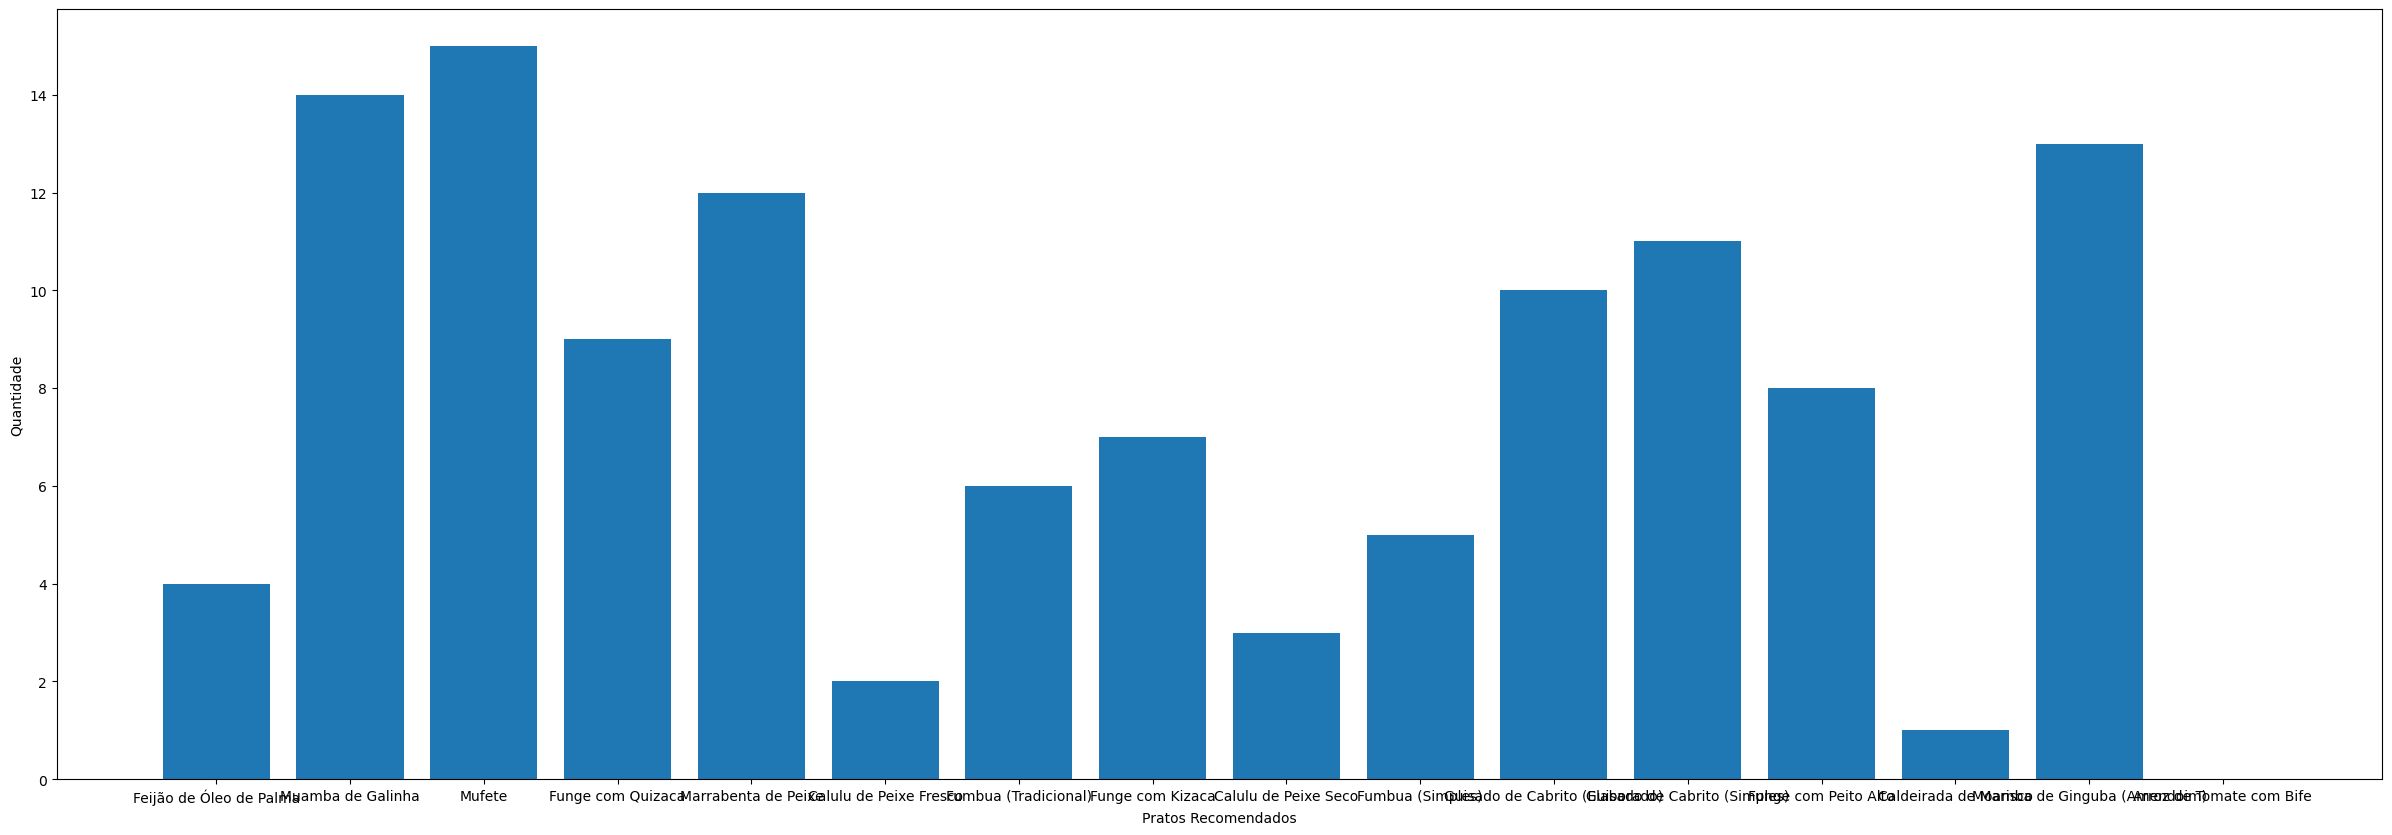

In [84]:
# Prato mais recomendados

plt.figure(figsize=(30, 10))
plt.bar(encoder_prato_recomendado.inverse_transform(Pratos_number["PRATO_RECOMENDADO_ENCODER"]) , Pratos_number["PRATO_RECOMENDADO_ENCODER"])
plt.xlabel("Pratos Recomendados")
plt.ylabel("Quantidade")
plt.show()

### Dvidir os dados X e Y


In [85]:
#Dividir os dados

X = Pratos_number[["E_FIM_SEMANA" , "FUNGE_SIM_NAO" , "DIA_SEMANA_ENCODER" , "COMPLEXIDADE_MAX_ENCODER" , "PROTEINA_ONTEM_Carne Seca" , "PROTEINA_ONTEM_Carne Vaca" , "PROTEINA_ONTEM_Feijão" , "PROTEINA_ONTEM_Frango" , "PROTEINA_ONTEM_Miúdos" , "PROTEINA_ONTEM_Muamba" , "PROTEINA_ONTEM_Peixe" , "NATURALIDADE_Benguela" , "NATURALIDADE_Huíla" , "NATURALIDADE_Luanda" , "NATURALIDADE_Malanje" , "NATURALIDADE_Zaire"]]
y = Pratos_number["PRATO_RECOMENDADO_ENCODER"]


In [134]:
#Treinar o modelos com validação cruzada + train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)
modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(X_train, y_train)

#score = cross_val_score(modelo, X, y , cv=3 , scoring="accuracy")

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
previsao = modelo.predict(x_test)
score_ = accuracy_score(y_test, previsao)

f"Acurácia média: {score_* 100:.2f}%"

'Acurácia média: 80.00%'

In [136]:
f"Acurácia média: {score.mean() * 100:.2f}%"

'Acurácia média: 74.03%'

In [138]:
previsao

array([ 4,  4, 10, 10,  2,  4,  4,  9, 14,  4, 12, 14,  4,  5,  9, 12,  7,
        1,  5, 15, 14,  7,  5,  6,  5,  3,  7, 12,  9, 15])

In [139]:
encoder_prato_recomendado.inverse_transform(previsao)

array(['Feijão de Óleo de Palma', 'Feijão de Óleo de Palma',
       'Guisado de Cabrito (Elaborado)', 'Guisado de Cabrito (Elaborado)',
       'Calulu de Peixe Fresco', 'Feijão de Óleo de Palma',
       'Feijão de Óleo de Palma', 'Funge com Quizaca',
       'Muamba de Galinha', 'Feijão de Óleo de Palma',
       'Marrabenta de Peixe', 'Muamba de Galinha',
       'Feijão de Óleo de Palma', 'Fumbua (Simples)', 'Funge com Quizaca',
       'Marrabenta de Peixe', 'Funge com Kizaca', 'Caldeirada de Marisco',
       'Fumbua (Simples)', 'Mufete', 'Muamba de Galinha',
       'Funge com Kizaca', 'Fumbua (Simples)', 'Fumbua (Tradicional)',
       'Fumbua (Simples)', 'Calulu de Peixe Seco', 'Funge com Kizaca',
       'Marrabenta de Peixe', 'Funge com Quizaca', 'Mufete'], dtype=object)

### Dados que o modelo nunca viu

In [144]:
import pandas as pd

# Novo indivíduo (exemplo)
novo_individuo = pd.DataFrame([{
    "E_FIM_SEMANA": 1,  # fim de semana
    "FUNGE_SIM_NAO": 1, # vai comer funge
    "DIA_SEMANA_ENCODER": 6, # sábado
    "COMPLEXIDADE_MAX_ENCODER": 2, # alta complexidade
    "PROTEINA_ONTEM_Carne Seca": 0,
    "PROTEINA_ONTEM_Carne Vaca": 1,
    "PROTEINA_ONTEM_Feijão": 0,
    "PROTEINA_ONTEM_Frango": 0,
    "PROTEINA_ONTEM_Miúdos": 0,
    "PROTEINA_ONTEM_Muamba": 0,
    "PROTEINA_ONTEM_Peixe": 0,
    "NATURALIDADE_Benguela": 0,
    "NATURALIDADE_Huíla": 0,
    "NATURALIDADE_Luanda": 1,
    "NATURALIDADE_Malanje": 0,
    "NATURALIDADE_Zaire": 0
}])


In [145]:
# Fazer previsão
predicao = modelo.predict(novo_individuo)

# Decodificar para o nome do prato
prato_recomendado = encoder_prato_recomendado.inverse_transform(predicao)

print("Prato recomendado:", prato_recomendado[0])

Prato recomendado: Mufete


In [147]:
import joblib

# salvar modelo e encoders
joblib.dump(modelo, "modelo_pratos.pkl")
joblib.dump(encoder_ordinal_dia_semana, "encoder_dia_semana.pkl")
joblib.dump(encoder_ordinal_complexidade_max, "encoder_complexidade.pkl")
joblib.dump(encoder_one_hot_proteina, "encoder_proteina.pkl")
joblib.dump(encoder_one_hot_naturalidade, "encoder_naturalidade.pkl")
joblib.dump(encoder_prato_recomendado, "encoder_target.pkl")

['encoder_target.pkl']